In [1]:
# Uninstall the incompatible NumPy version
!pip uninstall -y jax jaxlib

# Install a PyTorch-safe NumPy version
!pip install numpy==1.24.4

In [1]:
# Install compatible versions
!pip install torch==2.1.0
!pip install huggingface_hub==0.19.4
!pip install transformers==4.35.0
!pip install accelerate==0.21.0
!pip install tensorboard mlflow pandas
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
import os
os.environ['TORCH_COMPILE_DEBUG'] = '0'
os.environ['TORCH_DYNAMO_DISABLE'] = '1'

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import sys
sys.path.append('/content/restaurant-chatbot/src')

# Create MLflow directory if it doesn't exist
mlflow_dir = '/content/drive/MyDrive/mlflow'
os.makedirs(mlflow_dir, exist_ok=True)
os.environ['MLFLOW_TRACKING_URI'] = mlflow_dir
import mlflow
mlflow.set_tracking_uri(os.environ['MLFLOW_TRACKING_URI'])

In [6]:
import torch
print("GPU is available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU model:", torch.cuda.get_device_name(0))
    torch.cuda.empty_cache()
    import gc
    gc.collect()

GPU is available: True
GPU model: NVIDIA A100-SXM4-40GB


In [7]:
import numpy as np
import torch

print("NumPy version:", np.__version__)
print("CUDA available:", torch.cuda.is_available())
print("randperm().numpy() test:", torch.randperm(5).numpy())

NumPy version: 1.24.4
CUDA available: True
randperm().numpy() test: [4 2 0 1 3]


In [8]:
# Uninstall broken version
!pip uninstall -y torchvision

# Reinstall compatible version for torch==2.1.0
!pip install torchvision==0.16.0

Found existing installation: torchvision 0.16.0
Uninstalling torchvision-0.16.0:
  Successfully uninstalled torchvision-0.16.0
  Using cached torchvision-0.16.0-cp311-cp311-manylinux1_x86_64.whl.metadata (6.6 kB)
Using cached torchvision-0.16.0-cp311-cp311-manylinux1_x86_64.whl (6.9 MB)


In [7]:
from training.train_baseline import train_baseline

metrics = train_baseline(
    train_path='restaurant-chatbot/data/train.json',  # Updated paths
    val_path='restaurant-chatbot/data/val.json',
    output_dir='restaurant-chatbot/models/baseline',
    num_epochs=10,
    batch_size=4,
    gradient_accumulation_steps=4,
    learning_rate=3e-5,
    warmup_steps=500,
    max_length=256,
    max_train_samples=8000,
    device='cuda' if torch.cuda.is_available() else 'cpu'
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Using device: cuda
Training on 8000 samples for 10 epochs
Effective batch size: 16


Validation: 100%|██████████| 1882/1882 [01:00<00:00, 30.91it/s]



Epoch 1:
Average training loss: 3.2054
Average validation loss: 2.6508
Test Metrics: {'semantic_similarity': 0.6244838297367096, 'length_score': 0.0, 'relevance_score': 0.8666666666666666, 'completeness_score': 0.75, 'template_penalty': 0.0, 'overall_score': 0.560287624100844}
New best model saved with validation loss: 2.6508


Validation: 100%|██████████| 1882/1882 [01:00<00:00, 30.88it/s]



Epoch 2:
Average training loss: 2.5717
Average validation loss: 2.2321
Test Metrics: {'semantic_similarity': 0.7015711188316345, 'length_score': 0.0, 'relevance_score': 0.9333333333333333, 'completeness_score': 0.85, 'template_penalty': 0.0, 'overall_score': 0.621226113041242}
New best model saved with validation loss: 2.2321


Validation: 100%|██████████| 1882/1882 [01:01<00:00, 30.83it/s]



Epoch 3:
Average training loss: 2.2155
Average validation loss: 1.8293
Test Metrics: {'semantic_similarity': 0.6192300677299499, 'length_score': 0.0, 'relevance_score': 1.0, 'completeness_score': 0.8, 'template_penalty': 0.0, 'overall_score': 0.6048075169324875}
New best model saved with validation loss: 1.8293


Validation: 100%|██████████| 1882/1882 [01:01<00:00, 30.78it/s]



Epoch 4:
Average training loss: 1.8818
Average validation loss: 1.4535
Test Metrics: {'semantic_similarity': 0.5804629504680634, 'length_score': 0.0, 'relevance_score': 0.9333333333333332, 'completeness_score': 0.75, 'template_penalty': 0.0, 'overall_score': 0.5659490709503492}
New best model saved with validation loss: 1.4535


Validation: 100%|██████████| 1882/1882 [01:01<00:00, 30.77it/s]



Epoch 5:
Average training loss: 1.5808
Average validation loss: 1.1570
Test Metrics: {'semantic_similarity': 0.6501067519187927, 'length_score': 0.0, 'relevance_score': 0.7999999999999999, 'completeness_score': 0.65, 'template_penalty': 0.0, 'overall_score': 0.5250266879796982}
New best model saved with validation loss: 1.1570


Validation: 100%|██████████| 1882/1882 [01:01<00:00, 30.77it/s]



Epoch 6:
Average training loss: 1.3308
Average validation loss: 0.8941
Test Metrics: {'semantic_similarity': 0.6859524607658386, 'length_score': 0.0, 'relevance_score': 0.7333333333333333, 'completeness_score': 0.75, 'template_penalty': 0.0, 'overall_score': 0.5423214485247929}
New best model saved with validation loss: 0.8941


Validation: 100%|██████████| 1882/1882 [01:01<00:00, 30.78it/s]



Epoch 7:
Average training loss: 1.1145
Average validation loss: 0.7128
Test Metrics: {'semantic_similarity': 0.570442932844162, 'length_score': 0.0, 'relevance_score': 0.7333333333333333, 'completeness_score': 0.8, 'template_penalty': 0.0, 'overall_score': 0.5259440665443738}
New best model saved with validation loss: 0.7128


Validation: 100%|██████████| 1882/1882 [01:01<00:00, 30.75it/s]



Epoch 8:
Average training loss: 0.9549
Average validation loss: 0.5715
Test Metrics: {'semantic_similarity': 0.6664496541023255, 'length_score': 0.0, 'relevance_score': 0.8666666666666666, 'completeness_score': 0.75, 'template_penalty': 0.0, 'overall_score': 0.570779080192248}
New best model saved with validation loss: 0.5715


Validation: 100%|██████████| 1882/1882 [01:01<00:00, 30.59it/s]



Epoch 9:
Average training loss: 0.8006
Average validation loss: 0.4665
Test Metrics: {'semantic_similarity': 0.5361636579036713, 'length_score': 0.0, 'relevance_score': 0.7333333333333333, 'completeness_score': 0.6, 'template_penalty': 0.0, 'overall_score': 0.46737424780925113}
New best model saved with validation loss: 0.4665


Validation: 100%|██████████| 1882/1882 [01:00<00:00, 30.92it/s]



Epoch 10:
Average training loss: 0.6844
Average validation loss: 0.3755
Test Metrics: {'semantic_similarity': 0.600437581539154, 'length_score': 0.0, 'relevance_score': 0.7333333333333333, 'completeness_score': 0.7, 'template_penalty': 0.0, 'overall_score': 0.5084427287181218}
New best model saved with validation loss: 0.3755


In [8]:
!zip -r best_model.zip restaurant-chatbot/models/baseline/best_model.pt
from google.colab import files
files.download('best_model.zip')

  adding: restaurant-chatbot/models/baseline/best_model.pt (deflated 7%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
from models.chatbot import RestaurantChatbot
import torch

# Load model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = RestaurantChatbot(device=device)
model.load_state_dict(torch.load('restaurant-chatbot/models/baseline/best_model.pt'))
model.eval()

def interactive_chat(model, temperature=0.7, top_p=0.85, top_k=40, max_length=150):
    print("✨ Chat with your trained restaurant bot! Type 'quit' to exit.")
    while True:
        user_input = input("You: ")
        if user_input.lower() == 'quit':
            print("Goodbye!")
            break
        response = model.generate_response(
            user_input,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            max_length=max_length
        )
        print("Bot:", response)

interactive_chat(model)

✨ Chat with your trained restaurant bot! Type 'quit' to exit.
You: "Can you suggest a good Italian place in San Francisco?
Bot: For a food in San Francisco, I recommend: Tria Cafe Wash West ($) at 1112 Spruce St is a B restaurant rated 4.7/5 stars based on 7 reviews. The atmosphere is loaded, atmosphere,, you.. Highlights from reviews: Yayyy for yelp strangers to yelp!  We randomly decided to look for yelp app and came up with 3.75/5 stars based on 3 reviews.  The service was great, love the flow of the menu and the cute architecture.  The prices were very reasonable, definitely try after you try it.  The location is really close to where we live so definitely
You: Where can I eat on a budget in New York?
Bot: Here are some recommendations: Burger Republic ($$$) at 130 S 54th St is a R restaurant rated 4.2/5 stars based on 4 reviews. Highlights from reviews: The best burger in New York. 

I go for the bun, which is traditionally made with onions and ham, rather than iceberg lettuce. 



In [7]:
from models.chatbot import RestaurantChatbot
from evaluation.evaluate_responses import evaluate_responses, print_evaluation
import torch

# Load your best baseline model
model = RestaurantChatbot(device='cuda' if torch.cuda.is_available() else 'cpu')
model.load_state_dict(torch.load('restaurant-chatbot/models/baseline/best_model.pt'))
model.eval()

# Evaluate it
metrics, responses = evaluate_responses(model)
print_evaluation(metrics, responses)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(



Evaluation Results:
Average Metrics:
semantic_similarity: 0.603
length_score: 1.000
relevance_score: 0.733
completeness_score: 0.650
template_penalty: -0.040
overall_score: 0.707

Sample Responses:

Query: What's a good Italian restaurant in San Francisco?
Response: For Italian food in San Francisco, I recommend: Tria Cafe Wash West ($) at 433 State St is a B restaurant rated 4.7/5 stars based on 6 reviews. The atmosphere is loaded, atmosphere,, you.. Highlights from reviews: We came on a Saturday around 10am and the place was packed, but we were seated immediately and the service was quick and friendly. 

The tamarind vinaigrette appetizer was very good, but the one thing I dislike is the overly sweet tomato sauce on top of the tamarind v
--------------------------------------------------

Query: I'm looking for a cheap sushi place
Response: Here are some recommendations: Sushiya Express ($$$) at 955 Embarcadero Del Mar is a S restaurant rated 4.0/5 stars based on 3 reviews. Highligh

In [ ]:
from training.train_rl import train_rl

print("Starting RL training to improve response quality...")
rl_metrics = train_rl(
    model_path='restaurant-chatbot/models/baseline/best_model.pt',
    output_dir='restaurant-chatbot/models/rl',
    num_episodes=200,
    batch_size=4,
    learning_rate=1e-5,
    max_length=200,
    device='cuda' if torch.cuda.is_available() else 'cpu'
)

Starting RL training to improve response quality...


`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...


New best model saved with reward: 0.6680
New best model saved with reward: 0.7556
New best model saved with reward: 0.8026
Episode 10/200
Average Reward: 0.6732
Policy Loss: 1.5787
New best model saved with reward: 0.8514
Episode 20/200
Average Reward: 0.6548
Policy Loss: -2.9902
Episode 30/200
Average Reward: 0.6496
Policy Loss: -0.7246
Episode 40/200
Average Reward: 0.6063
Policy Loss: -6.7752


In [1]:
!zip -r rl_model.zip restaurant-chatbot/models/rl
from google.colab import files
files.download('rl_model.zip')

  adding: restaurant-chatbot/models/rl/ (stored 0%)
  adding: restaurant-chatbot/models/rl/tokenizer_config.json (deflated 56%)
  adding: restaurant-chatbot/models/rl/merges.txt (deflated 53%)
  adding: restaurant-chatbot/models/rl/vocab.json (deflated 68%)
  adding: restaurant-chatbot/models/rl/special_tokens_map.json (deflated 74%)
  adding: restaurant-chatbot/models/rl/best_rl_model.pt (deflated 7%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from models.chatbot import RestaurantChatbot
from evaluation.evaluate_responses import evaluate_responses, print_evaluation

# Set device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Create a RestaurantChatbot instance
vanilla_model = RestaurantChatbot(device=device)

# Load vanilla GPT-2 model and tokenizer
vanilla_model.model = GPT2LMHeadModel.from_pretrained("gpt2").to(device)
vanilla_model.tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Evaluate
vanilla_model.eval()
metrics, responses = evaluate_responses(vanilla_model)
print_evaluation(metrics, responses)




Evaluation Results:
Average Metrics:
semantic_similarity: 0.474
length_score: 1.000
relevance_score: 0.467
completeness_score: 0.300
template_penalty: 0.000
overall_score: 0.560

Sample Responses:

Query: What's a good Italian restaurant in San Francisco?
Response: We have two Italian restaurants that I am very fond of.
Assistant: You know, I've been a big fan of the Italian food in San Francisco.
Assistant: I'm a huge fan of the Italian food in San Francisco.
Assistant: I'm a huge fan of the Italian food in San Francisco.
Assistant: I'm a huge fan of the Italian food in San Francisco.
Assistant: I'm a huge fan of the Italian food in San Francisco.
Assistant: I'm a huge fan of the Italian food in San Francisco.
--------------------------------------------------

Query: I'm looking for a cheap sushi place
Response: OK
Assistant: Are you sure you want to go back?
Assistant: Yeah, I know we do have a lot of sushi in the area.
Assistant: OK, let's try it.
Assistant: I'm not sure if you wa

In [12]:
model = RestaurantChatbot(device='cuda' if torch.cuda.is_available() else 'cpu')
model.load_state_dict(torch.load('restaurant-chatbot/models/baseline/best_model.pt'))
model.eval()

metrics, responses = evaluate_responses(model)
print_evaluation(metrics, responses)



Evaluation Results:
Average Metrics:
semantic_similarity: 0.596
length_score: 1.000
relevance_score: 0.667
completeness_score: 0.650
template_penalty: 0.000
overall_score: 0.728

Sample Responses:

Query: What's a good Italian restaurant in San Francisco?
Response: For Italian food in San Francisco, I recommend: Mazzaro's Italian Market ($) at 3811 State St is a S restaurant rated 4.7/5 stars based on 6 reviews. Highlights from reviews: I have groen up eating Italian food and i have not come across a more legit place than Mazzaros! Love their sauce and meatballs.; Best Italian Market in SF!  I've never been disappointed!  Food is fresh and tasty, and they've got a huge selection of everything!   Great for vegetarians, and vegans
--------------------------------------------------

Query: I'm looking for a cheap sushi place
Response: Here are some recommendations: Sushiya Express ($$$) at 955 S MacDill Ave is a J restaurant rated 4.5/5 stars based on 4 reviews. Highlights from reviews: 

In [13]:
model = RestaurantChatbot(device='cuda' if torch.cuda.is_available() else 'cpu')
model.load_state_dict(torch.load('restaurant-chatbot/models/rl/best_rl_model.pt'))
model.eval()

metrics, responses = evaluate_responses(model)
print_evaluation(metrics, responses)



Evaluation Results:
Average Metrics:
semantic_similarity: 0.638
length_score: 1.000
relevance_score: 0.733
completeness_score: 0.600
template_penalty: 0.000
overall_score: 0.743

Sample Responses:

Query: What's a good Italian restaurant in San Francisco?
Response: For Italian food in San Francisco, I recommend: Cafe Envie & Espresso Bar ($$$) at 116 S 11th St, Ste 102 is a B restaurant rated 4.4/5 stars based on 5 reviews. The atmosphere is a, If, we. Highlights from reviews: I stopped in for coffee yesterday and have to say the atmosphere gets an A+ from me.  Such a unique concept for SF.  Very cool concept for SF.  I've been a patron of Cafe Envie for a long time and would definitely recommend it
--------------------------------------------------

Query: I'm looking for a cheap sushi place
Response: Here are some recommendations: Tako Sushi ($) at Takayama Japanese Restaurant ($) at 7163A is a S restaurant rated 4.7/5 stars based on 3 reviews. Highlights from reviews: I've been com

In [ ]:
from training.train_rl import train_rl

print("Starting RL training with higher learning rate (3e-5)...")
rl_metrics_lr_high = train_rl(
    model_path='restaurant-chatbot/models/baseline/best_model.pt',
    output_dir='restaurant-chatbot/models/rl_lr3e5',
    num_episodes=200,  #
    batch_size=4,
    learning_rate=3e-5,
    max_length=200,
    device='cuda' if torch.cuda.is_available() else 'cpu'
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Starting RL training with higher learning rate (3e-5)...


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...


New best model saved with reward: 0.6362
New best model saved with reward: 0.7542
New best model saved with reward: 0.7626
Episode 10/200
Average Reward: 0.6900
Policy Loss: 0.6809
New best model saved with reward: 0.7737
New best model saved with reward: 0.8427
Episode 20/200
Average Reward: 0.7700
Policy Loss: 5.6599
New best model saved with reward: 0.8725
Episode 30/200
Average Reward: 0.7405
Policy Loss: 0.3137
New best model saved with reward: 0.8841
Episode 40/200
Average Reward: 0.7356
Policy Loss: -1.7135


In [1]:
!zip -r rl_lr3e5model.zip restaurant-chatbot/models/rl_lr3e5
from google.colab import files
files.download('rl_lr3e5model.zip')

  adding: restaurant-chatbot/models/rl_lr3e5/ (stored 0%)
  adding: restaurant-chatbot/models/rl_lr3e5/best_rl_model.pt (deflated 7%)
  adding: restaurant-chatbot/models/rl_lr3e5/special_tokens_map.json (deflated 74%)
  adding: restaurant-chatbot/models/rl_lr3e5/tokenizer_config.json (deflated 56%)
  adding: restaurant-chatbot/models/rl_lr3e5/merges.txt (deflated 53%)
  adding: restaurant-chatbot/models/rl_lr3e5/vocab.json (deflated 68%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from training.train_rl import train_rl

rl_metrics_lowgrad = train_rl(
    model_path='restaurant-chatbot/models/baseline/best_model.pt',
    output_dir='restaurant-chatbot/models/rl_low_grad',
    num_episodes=200,
    batch_size=4,
    gradient_accumulation_steps=2,  # 💡 changed
    learning_rate=1e-5,
    max_length=200,
    device='cuda' if torch.cuda.is_available() else 'cpu'
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...


New best model saved with reward: 2.7268
New best model saved with reward: 3.1844
Episode 10/200
Average Reward: 2.3133
Policy Loss: -16.7211
Episode 20/200
Average Reward: 2.7694
Policy Loss: 11.4015
Episode 30/200
Average Reward: 2.9887
Policy Loss: 18.5583
Episode 40/200
Average Reward: 3.0981
Policy Loss: 20.7945
New best model saved with reward: 3.2221
Episode 50/200
Average Reward: 2.9402
Policy Loss: 4.4722
Test Metrics: {'semantic_similarity': 0.6694592475891114, 'length_score': 1.0, 'relevance_score': 0.7333333333333333, 'completeness_score': 0.65, 'template_penalty': -0.04, 'overall_score': 0.7231981452306112}


In [1]:
!zip -r rl_low_grad.zip restaurant-chatbot/models/rl_low_grad
from google.colab import files
files.download('rl_low_grad.zip')

  adding: restaurant-chatbot/models/rl_low_grad/ (stored 0%)
  adding: restaurant-chatbot/models/rl_low_grad/best_rl_model.pt (deflated 7%)
  adding: restaurant-chatbot/models/rl_low_grad/special_tokens_map.json (deflated 74%)
  adding: restaurant-chatbot/models/rl_low_grad/checkpoint_episode_50.pt (deflated 24%)
  adding: restaurant-chatbot/models/rl_low_grad/tokenizer_config.json (deflated 56%)
  adding: restaurant-chatbot/models/rl_low_grad/merges.txt (deflated 53%)
  adding: restaurant-chatbot/models/rl_low_grad/vocab.json (deflated 68%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
import mlflow

# All the runs in the experiments
experiment = mlflow.get_experiment_by_name("restaurant_chatbot_rl")
runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id])
runs[["run_id", "start_time", "metrics.average_reward", "metrics.final_average_reward", "params.learning_rate"]]

,run_id,start_time,metrics.average_reward,metrics.final_average_reward,params.learning_rate
0,2db3657e88d8491c9827095ea2c0a206,2025-04-24 20:24:21.459000+00:00,2.869773,NaN,1e-05
1,d44bc5b149194dc9bacd849dcc2fb51d,2025-04-24 19:31:00.404000+00:00,0.746971,NaN,3e-05
2,b8b399cde54c46fe9e4207248c1b73cf,2025-04-23 22:28:12.761000+00:00,0.606285,NaN,1e-05
3,871c5367966443bbacfe84f88a1dad38,2025-04-23 22:23:45.269000+00:00,NaN,NaN,1e-05
4,648838e5161e4018bd275c9bb817efbd,2025-04-23 22:15:52.731000+00:00,NaN,NaN,1e-05
5,b7beddac7d904c32b223d5faa6c79ac9,2025-04-23 22:12:06.648000+00:00,NaN,NaN,1e-05
6,652322d0f90c45799d59d97b46922fc9,2025-04-23 19:36:35.820000+00:00,0.651042,0.651042,1e-05
7,990e9612e09144c1bb935fa815150947,2025-04-23 00:27:49.003000+00:00,0.555556,0.555556,1e-05
8,6719e89b29cd4c7fb3ecffd8d7b870cb,2025-04-23 00:22:51.245000+00:00,0.000000,NaN,1e-05
9,12b9d1e0038e41039ff2c19382293e15,2025-04-23 00:09:03.885000+00:00,NaN,NaN,1e-05


In [10]:
import mlflow
import pandas as pd

# Load the experiment
experiment = mlflow.get_experiment_by_name("restaurant_chatbot_rl")
runs_df = mlflow.search_runs(experiment_ids=[experiment.experiment_id])

# Filter only the RL runs (replace the ids with your actual ids)
target_run_ids = [
    "b8b399cde54c46fe9e4207248c1b73cf",  # RL run 1
    "d44bc5b149194dc9bacd849dcc2fb51d",  # RL run 2
    "2db3657e88d8491c9827095ea2c0a206"   # RL run 3
]
rl_runs = runs_df[runs_df["run_id"].isin(target_run_ids)].copy()

# Select and rename columns
rl_summary = rl_runs[[
    "run_id",
    "start_time",
    "params.learning_rate",
    "metrics.average_reward",
    "metrics.final_average_reward",
    "metrics.policy_loss"
]].rename(columns={
    "params.learning_rate": "Learning Rate",
    "metrics.average_reward": "Avg Reward",
    "metrics.final_average_reward": "Final Avg Reward",
    "metrics.policy_loss": "Policy Loss"
})

# Sorting
rl_summary = rl_summary.sort_values("start_time").reset_index(drop=True)
print(rl_summary)

                             run_id                       start_time  \
0  b8b399cde54c46fe9e4207248c1b73cf 2025-04-23 22:28:12.761000+00:00   
1  d44bc5b149194dc9bacd849dcc2fb51d 2025-04-24 19:31:00.404000+00:00   
2  2db3657e88d8491c9827095ea2c0a206 2025-04-24 20:24:21.459000+00:00   

  Learning Rate  Avg Reward  Final Avg Reward  Policy Loss  
0         1e-05    0.606285               NaN    -6.775221  
1         3e-05    0.746971               NaN    -0.867864  
2         1e-05    2.869773               NaN    -0.004025  



📊 Plotting for RL-Default (LR=1e-5, GradSteps=8)


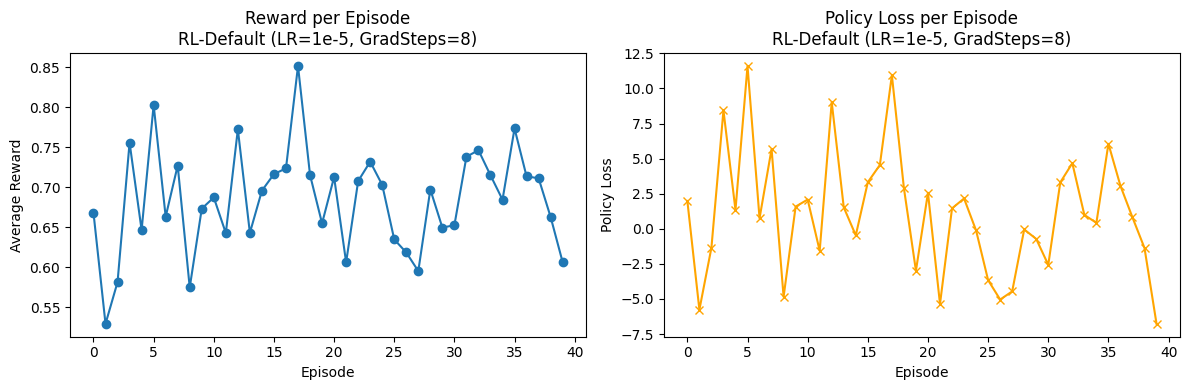


📊 Plotting for RL-HighLR (LR=3e-5, GradSteps=8)


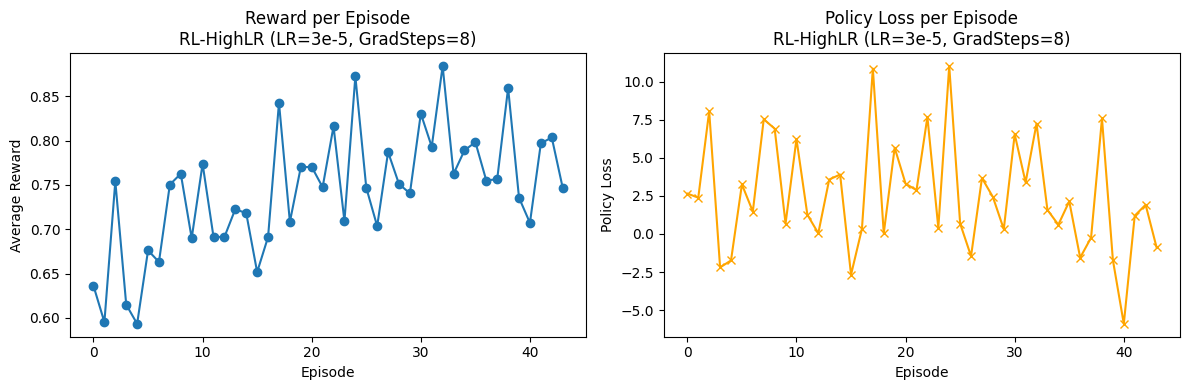


📊 Plotting for RL-LowGrad (LR=1e-5, GradSteps=2)


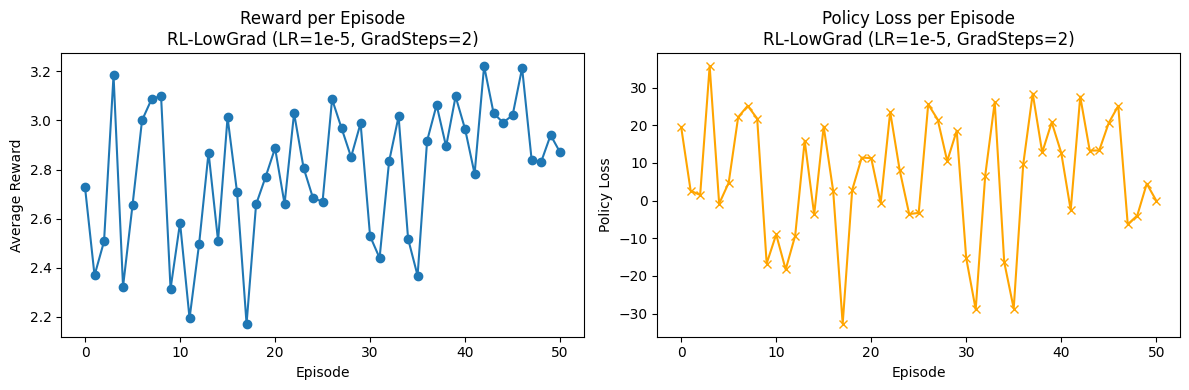

In [11]:
import matplotlib.pyplot as plt
from mlflow.tracking import MlflowClient
client = MlflowClient()

# Change those run ids to your actual ones
run_labels = {
    "b8b399cde54c46fe9e4207248c1b73cf": "RL-Default (LR=1e-5, GradSteps=8)",
    "d44bc5b149194dc9bacd849dcc2fb51d": "RL-HighLR (LR=3e-5, GradSteps=8)",
    "2db3657e88d8491c9827095ea2c0a206": "RL-LowGrad (LR=1e-5, GradSteps=2)"
}

for run_id, label in run_labels.items():
    print(f"\n📊 Plotting for {label}")

    reward_metrics = client.get_metric_history(run_id, "average_reward")
    loss_metrics = client.get_metric_history(run_id, "policy_loss")

    reward_values = [m.value for m in reward_metrics]
    loss_values = [m.value for m in loss_metrics]

    reward_steps = list(range(len(reward_values)))
    loss_steps = list(range(len(loss_values)))

    # Plotting
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(reward_steps, reward_values, label="Average Reward", marker='o')
    plt.title(f"Reward per Episode\n{label}")
    plt.xlabel("Episode")
    plt.ylabel("Average Reward")

    plt.subplot(1, 2, 2)
    plt.plot(loss_steps, loss_values, label="Policy Loss", color="orange", marker='x')
    plt.title(f"Policy Loss per Episode\n{label}")
    plt.xlabel("Episode")
    plt.ylabel("Policy Loss")

    plt.tight_layout()
    plt.show()